# Fig. 13: Normalized WINERED spectra

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
from astropy.io import fits
from astropy import wcs
import matplotlib.ticker as ticker
from matplotlib import gridspec

Some plotting parameters.

In [12]:
APJ_SINGLE_COL = 3.5
APJ_DOUBLE_COL = 7.
TEXTSIZE=12
TICKSIZE=10

WR_RED = '#80273F'
WR_GREEN = '#008000'

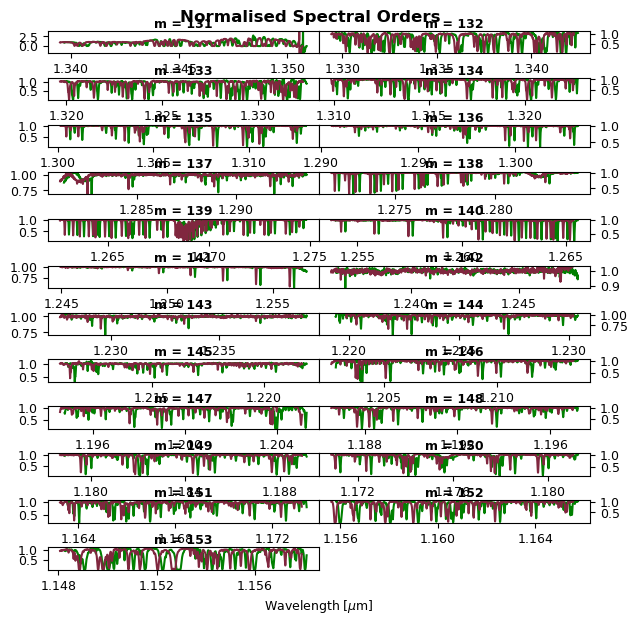

In [14]:
%matplotlib inline
norders = 154-131
fig = plt.figure(figsize=(APJ_DOUBLE_COL, APJ_DOUBLE_COL))
gs = gridspec.GridSpec(ncols=2, nrows=12, hspace=1.1, wspace=0., figure=fig)


ft = 'VAC_norm'
ft2 = 'VAC_norm'
o = 132

for n, o in enumerate(range(131,154)):
    nr = int((n + (n+1)%2 - 1)/2.)
    ax = fig.add_subplot(gs[nr, n%2])
    f = f'/Users/lsluijs/Projects/WINERED/pre_processing/WASP-189/2023A/2023_06_09/WARP_out/WASP-189_sum/{ft}/fsr1.30/WASP-189_sum_m{o}_fsr1.30_{ft2}.fits'
    hdul = fits.open(f)
    flux = fits.getdata(f)
    wl = 1e-4 * np.array(wcs.WCS(hdul[0].header, relax=True).wcs_pix2world(np.arange(len(flux)), 0)[0])
    ax.plot(wl+2e-4, flux, color=WR_GREEN)
    ymin, ymax = flux.min(), flux.max()
    if o == 131: ymax = 4.
    ax.set_ylim(ymin, ymax)
    
    f = f'/Users/lsluijs/Projects/WINERED/pre_processing/WASP-189/2024A/2024_04_19/WARP_out/WASP-189_sum/{ft}/fsr1.30/WASP-189_sum_m{o}_fsr1.30_{ft2}.fits'
    hdul = fits.open(f)
    flux = fits.getdata(f)
    wl = 1e-4 * np.array(wcs.WCS(hdul[0].header, relax=True).wcs_pix2world(np.arange(len(flux)), 0)[0])
    ax.plot(wl, flux,color=WR_RED)
    
    if n%2 == 1:
        ax.yaxis.tick_right()
    
    ax.xaxis.set_major_formatter('{x:.3f}')
    ax.set_title(f'm = {o}', size=TICKSIZE-1, fontweight='bold', y=0.78)
    
    if o == 153:
        ax.set_xlabel(r'Wavelength [$\mu$m]', size=TICKSIZE-1, x=1.)
        
    ax.tick_params(axis='both', which='major', labelsize=9)
        
    ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
        
plt.suptitle('Normalised Spectral Orders', size=TEXTSIZE, y=0.91, fontweight='bold')
plt.savefig(f'../figures/Fig13_normalised_spectral_orders.png', dpi=150, bbox_inches='tight')
plt.savefig(f'../figures/Fig13_normalised_spectral_orders.pdf', bbox_inches='tight')

plt.show()